# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

Student: Hanifa Safdari

Dataset:
 Heart Disease
 Dataset (Cleveland Database)

Date:October 8, 2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on the Heart Disease dataset to identify patterns and test meaningful hypotheses about cardiovascular risk factors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, levene
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names, na_values='?')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:")
df.describe()

=== DATASET OVERVIEW ===
Shape: (303, 14)

Data types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Handle missing values and create binary target
print(f"Original shape: {df.shape}")
df = df.dropna()
print(f"After removing missing: {df.shape}")

df['target_binary'] = (df['target'] > 0).astype(int)
print("\n Target converted to binary (0=No disease, 1=Disease)")

Original shape: (297, 15)
After removing missing: (297, 15)

 Target converted to binary (0=No disease, 1=Disease)


Target Distribution:
target_binary
0    160
1    137
Name: count, dtype: int64


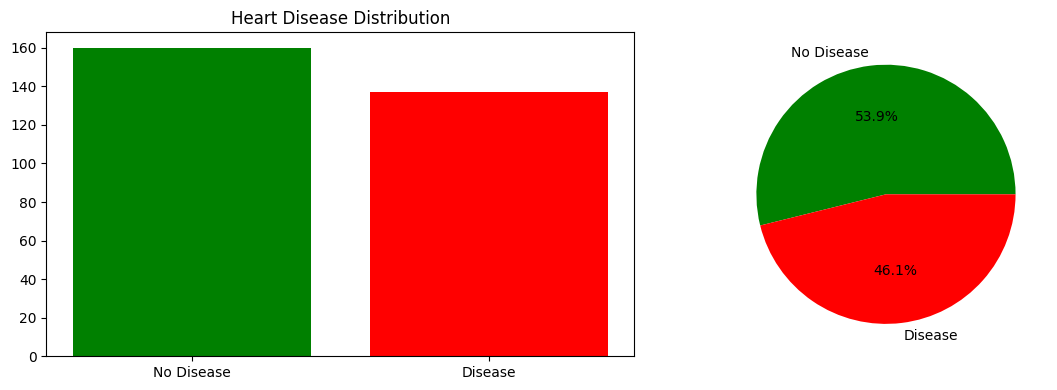

In [ ]:
target_counts = df['target_binary'].value_counts()
print("Target Distribution:")
print(target_counts)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(target_counts.index, target_counts.values, color=['green', 'red'])
axes[0].set_title('Heart Disease Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Disease', 'Disease'])

axes[1].pie(target_counts.values, labels=['No Disease', 'Disease'],
            autopct='%1.1f%%', colors=['green', 'red'])

plt.tight_layout()
plt.show()

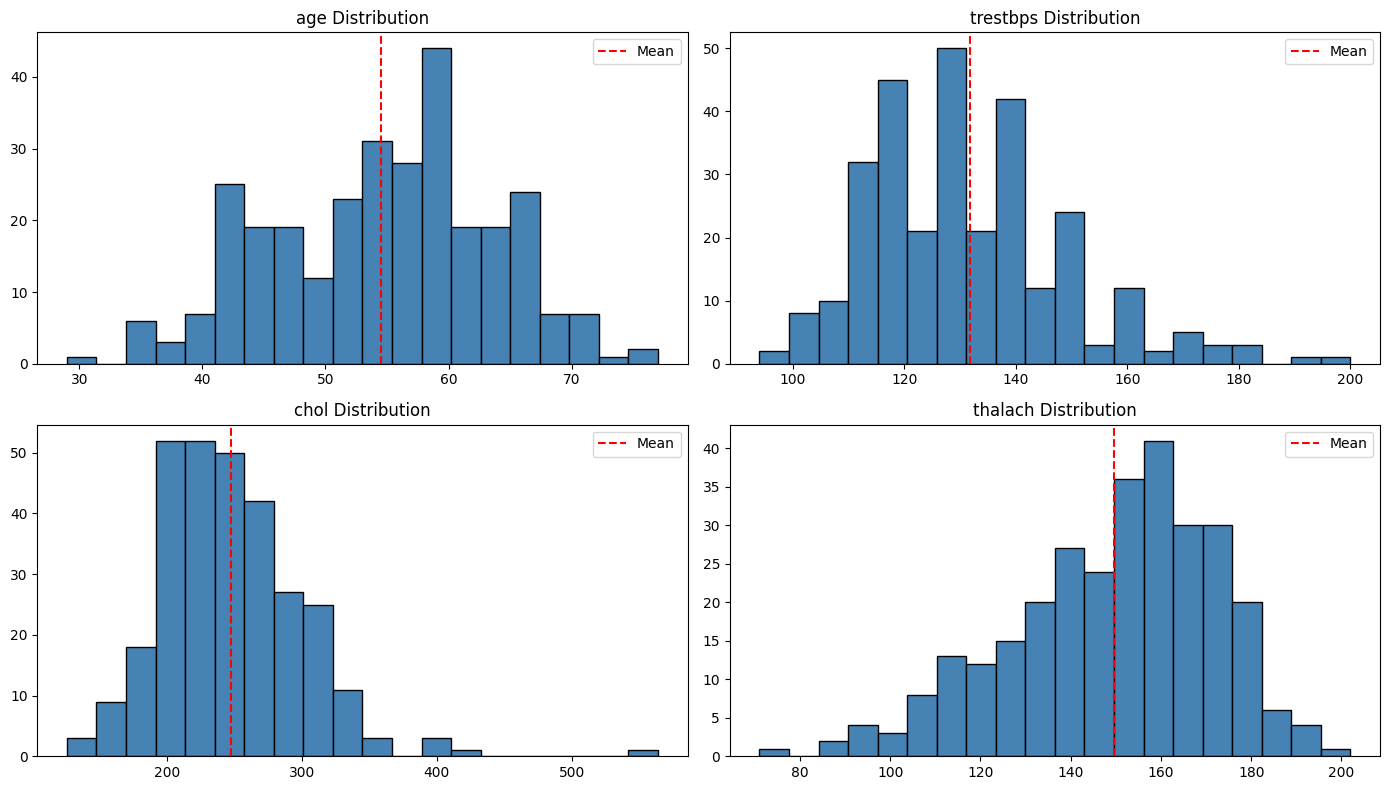


Statistics:


,age,trestbps,chol,thalach
count,297.00,297.00,297.00,297.00
mean,54.54,131.69,247.35,149.60
std,9.05,17.76,52.00,22.94
min,29.00,94.00,126.00,71.00
25%,48.00,120.00,211.00,133.00
50%,56.00,130.00,243.00,153.00
75%,61.00,140.00,276.00,166.00
max,77.00,200.00,564.00,202.00


In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].legend()

plt.tight_layout()
plt.show()

print("\nStatistics:")
df[numerical_cols].describe().round(2)

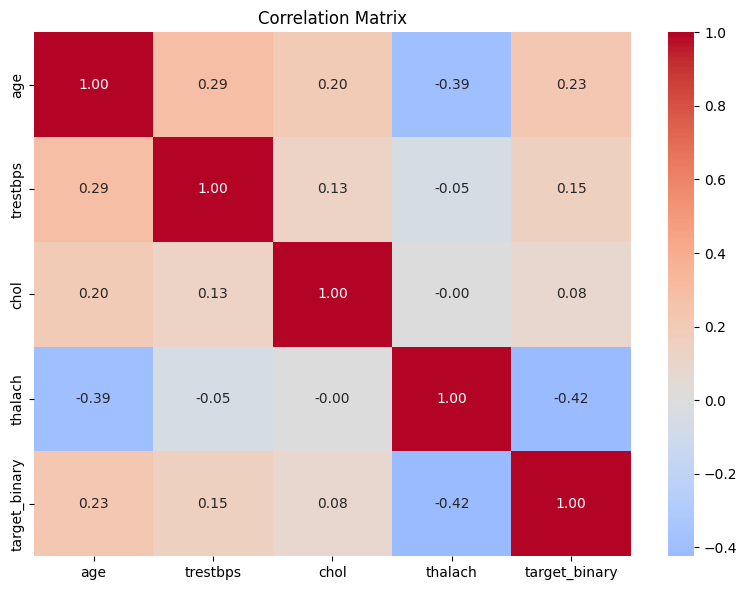


Correlations with Target:
target_binary    1.000000
age              0.227075
trestbps         0.153490
chol             0.080285
thalach         -0.423817
Name: target_binary, dtype: float64


In [ ]:
corr_cols = ['age', 'trestbps', 'chol', 'thalach', 'target_binary']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelations with Target:")
print(corr_matrix['target_binary'].sort_values(ascending=False))

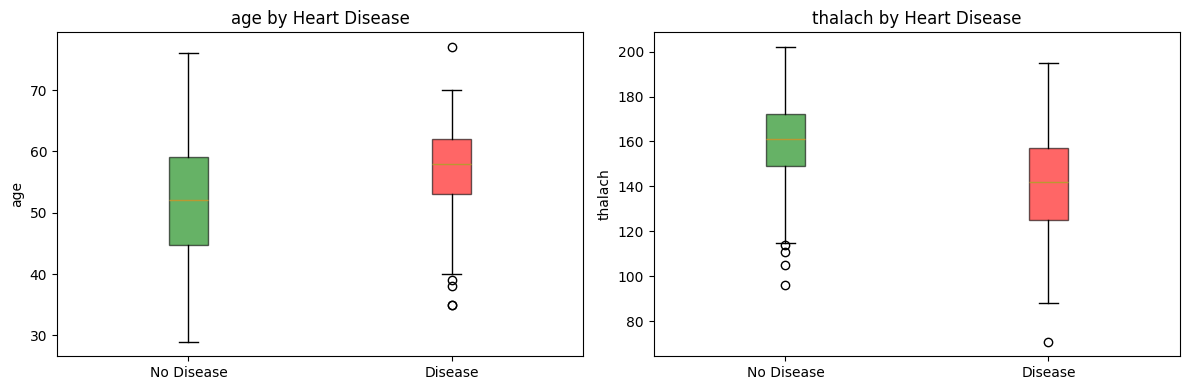

In [ ]:
key_vars = ['age', 'thalach']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, col in enumerate(key_vars):
    data = [df[df['target_binary']==0][col], df[df['target_binary']==1][col]]
    bp = axes[i].boxplot(data, labels=['No Disease', 'Disease'], patch_artist=True)

    for patch, color in zip(bp['boxes'], ['green', 'red']):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    axes[i].set_title(f'{col} by Heart Disease')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [23]:
print("="*60)
print("HYPOTHESIS 1: Age and Heart Disease")
print("="*60)

age_no = df[df['target_binary']==0]['age']
age_yes = df[df['target_binary']==1]['age']

print(f"\nNo Disease: Mean={age_no.mean():.1f}, SD={age_no.std():.1f}")
print(f"Disease: Mean={age_yes.mean():.1f}, SD={age_yes.std():.1f}")

# Check normality
_, p1 = shapiro(age_no)
_, p2 = shapiro(age_yes)
print(f"\nNormality test: p1={p1:.4f}, p2={p2:.4f}")

# t-test
t_stat, p_val = stats.ttest_ind(age_yes, age_no)
print(f"\nt-test: t={t_stat:.3f}, p={p_val:.4f}")

if p_val < 0.05:
    print("REJECT H0: Age differs significantly")
else:
    print("FAIL TO REJECT H0")

HYPOTHESIS 1: Age and Heart Disease

No Disease: Mean=52.6, SD=9.6
Disease: Mean=56.8, SD=7.9

Normality test: p1=0.1110, p2=0.0017

t-test: t=4.005, p=0.0001
REJECT H0: Age differs significantly


In [ ]:
print("\n" + "="*60)
print("HYPOTHESIS 2: Chest Pain Type and Heart Disease")
print("="*60)

contingency = pd.crosstab(df['cp'], df['target_binary'])
print("\nContingency Table:")
print(contingency)

chi2, p_val, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square: χ²={chi2:.3f}, p={p_val:.4f}")

if p_val < 0.05:
    print("REJECT H0: Chest pain type is associated")
else:
    print(" FAIL TO REJECT H0")


HYPOTHESIS 2: Chest Pain Type and Heart Disease

Contingency Table:
target_binary   0    1
cp                    
1.0            16    7
2.0            40    9
3.0            65   18
4.0            39  103

Chi-square: χ²=77.276, p=0.0000
REJECT H0: Chest pain type is associated


In [ ]:
print("\n" + "="*60)
print("HYPOTHESIS 3: Max Heart Rate and Heart Disease")
print("="*60)

hr_no = df[df['target_binary']==0]['thalach']
hr_yes = df[df['target_binary']==1]['thalach']

print(f"\nNo Disease: Mean={hr_no.mean():.1f}, SD={hr_no.std():.1f}")
print(f"Disease: Mean={hr_yes.mean():.1f}, SD={hr_yes.std():.1f}")

# t-test
t_stat, p_val = stats.ttest_ind(hr_no, hr_yes)
print(f"\nt-test: t={t_stat:.3f}, p={p_val:.4f}")

if p_val < 0.05:
    print("REJECT H0: Max heart rate differs significantly")
else:
    print(" FAIL TO REJECT H0")


HYPOTHESIS 3: Max Heart Rate and Heart Disease

No Disease: Mean=158.6, SD=19.0
Disease: Mean=139.1, SD=22.7

t-test: t=8.037, p=0.0000
REJECT H0: Max heart rate differs significantly


## Summary and Conclusions: (the Heart Disease dataset)

### Key Takeaway:
- All three hypotheses showed statistical significance (p < 0.05)
- Age is a significant risk factor for heart disease
- Chest pain type is strongly associated with disease presence
- Maximum heart rate is lower in patients with heart disease

### Limitations from this data:
- Sample size of ~300 patients
- Data from single location (Cleveland Clinic)
- Missing data required removal of some observations

### Conclusion:
This analysis confirmed that age, chest pain type, and maximum heart rate are all significant indicators of heart disease presence.